# Day 2 - Advanced Data Handling and Databases

Welcome to Day 2 of the advanced Python course. Today we will focus on **data handling** and **databases**:

- Build powerful data transformations with **comprehensions** and **generator expressions**
- Work with **SQLite** using **SQLAlchemy** (Python ORM)
- Load data from databases into **pandas DataFrame** objects
- Explore data with pandas (filtering, derived columns, groupby, joins)
- Load and save **Excel (xlsx)** files with pandas
- Visualize results with **matplotlib**
- Finish with a **complex scientific measurement analysis example**

## Daily agenda and course flow

**09:00 - 10:30 (1h 30m)**  
- Short recap of iterators and generators from Day 1
- List, dict, and set comprehensions
- Conditional and nested comprehensions
- Generator expressions vs list comprehensions

**10:30 - 10:45 (15m)**  
- Short break (stand up, drink water, stretch)

**10:45 - 12:00 (1h 15m)**  
- Relational databases: why and when
- SQLite and SQLAlchemy basics (engine, models, sessions)
- CRUD operations (Create, Read, Update, Delete)

**12:00 - 13:00 (1h)**  
- Lunch break

**13:00 - 14:45 (1h 45m)**  
- pandas DataFrame basics
- Loading data from SQL with `pandas.read_sql`
- Loading and saving Excel files with pandas
- DataFrame filtering, derived columns, groupby, merge

**14:45 - 15:00 (15m)**  
- Short break

**15:00 - 16:30 (1h 30m)**  
- Visualization with matplotlib (through pandas)
- Complex end-to-end example: analyzing physical surface size measurement data
- Wrap up and summary

Useful official documentation:

- pandas: https://pandas.pydata.org/docs/
- SQLAlchemy: https://docs.sqlalchemy.org/en/20/
- matplotlib: https://matplotlib.org/stable/users/index.html


## 1. Recap: iterators, generators, and data pipelines

In Day 1 we talked about **iterators**, **generators**, and basic functional tools like `map`, `filter`, and `itertools`.

Key points to remember:

- An **iterator** is an object that you can loop over with `for` and that implements the iterator protocol (`__iter__` and `__next__`).
- A **generator function** is a function that uses `yield` to produce a sequence of values lazily.
- A **generator expression** is a compact way to create a generator: `(expr for x in iterable)`.

These concepts are the foundation for:

- **Comprehensions** (list, dict, set) which build new collections from existing iterables.
- **Streaming pipelines** where we transform data step by step without loading everything at once.

In real world data processing, combining iterators, generators, and comprehensions gives you **readable** and **memory efficient** code.

In [1]:
# Simple recap: generator pipeline vs for-loop

numbers = [1, 2, 3, 4, 5, 6]

# Using a generator expression and sum
squared_even_sum = sum(n * n for n in numbers if n % 2 == 0)
print("Sum of squares of even numbers (generator expression):", squared_even_sum)

# Equivalent explicit for-loop
squared_even_sum_loop = 0
for n in numbers:
    if n % 2 == 0:
        squared_even_sum_loop += n * n
print("Sum of squares of even numbers (for-loop):", squared_even_sum_loop)


Sum of squares of even numbers (generator expression): 56
Sum of squares of even numbers (for-loop): 56


### ✏ Exercise 1.1 (easy): Filter and transform with a generator

In the cell below:

1. Create a list `raw_lengths_mm` of integer lengths in millimeters, for example `[10, 25, 50, 5, 100]`.
2. Use a **generator expression** together with `sum()` to compute the **total length in meters**:
   - First convert each millimeter value to meters (`mm / 1000`).
   - Ignore values smaller than 10 mm.
3. Print the result.

Use only concepts from Day 1 and the recap example above.

In [ ]:
# TODO: implement Exercise 1.1

# raw_lengths_mm = ...
# total_length_m = ...  # use a generator expression with sum()
# print("Total length in meters:", total_length_m)


In [2]:
# Reference solution for Exercise 1.1
raw_lengths_mm = [10, 25, 50, 5, 100]

total_length_m = sum(mm / 1000 for mm in raw_lengths_mm if mm >= 10)
print("Total length in meters:", total_length_m)


Total length in meters: 0.185


### ⚡ Exercise 1.2 (advanced): Build a simple cleaning pipeline

In the cell below you will create a small generator based cleaning pipeline:

1. Create a list `raw_measurements` that contains strings like `"12.5"`, `"  9.8"`, `"N/A"`, `"15.0"`.
2. Use a generator expression to:
   - Strip whitespace from each string.
   - Filter out entries that are equal to `"N/A"`.
   - Convert the remaining entries to `float`.
3. Compute the average of the cleaned float values.
4. Print the cleaned list and the average.

Hint: you can turn the generator into a list with `list(...)` if you want to print it.

In [3]:
# TODO: implement Exercise 1.2

# raw_measurements = ...
# cleaned_values_gen = ...  # generator that strips, filters out "N/A", and converts to float
# cleaned_values_list = ...
# average = ...
# print("Cleaned values:", cleaned_values_list)
# print("Average:", average)


In [4]:
# Reference solution for Exercise 1.2
raw_measurements = ["12.5", "  9.8", "N/A", "15.0"]

cleaned_values_gen = (
    float(s.strip())
    for s in raw_measurements
    if s.strip() != "N/A"
)

cleaned_values_list = list(cleaned_values_gen)
average = sum(cleaned_values_list) / len(cleaned_values_list)

print("Cleaned values:", cleaned_values_list)
print("Average:", average)


Cleaned values: [12.5, 9.8, 15.0]
Average: 12.433333333333332


## 2. Comprehensions and generator expressions

Python comprehensions provide a **compact syntax** to create new collections from existing iterables:

- **List comprehensions**: `[expr for x in iterable if condition]`
- **Dict comprehensions**: `{key_expr: value_expr for x in iterable if condition]`
- **Set comprehensions**: `{expr for x in iterable if condition]`
- **Generator expressions**: `(expr for x in iterable if condition]`

They are very common in real code because they are:

- Concise
- Often more readable than explicit loops
- Easy to combine with other tools like `sum`, `any`, `all`, and `max`

### 2.1 List comprehensions as map + filter

A **list comprehension** is a compact way to build a list:

```python
squares = [n * n for n in range(5)]
even_squares = [n * n for n in range(10) if n % 2 == 0]
```

You can think of it as combining:

- A `for` loop that iterates over an iterable
- A transformation (like `n * n`)
- An optional filter (`if condition`)

Real world uses:

- Cleaning input data (strip, lower, filter out empty values)
- Converting measurement units (mm to m, Celsius to Kelvin, etc.)
- Extracting one field from a list of dicts (e.g. all `email` fields)

**Best practice:**

- Use list comprehensions when the transformation and the filter are **simple**.
- If the logic becomes complex (multiple branches, many lines), a normal `for` loop is usually easier to read.


In [5]:
# Example: cleaning measurement labels with a list comprehension

raw_labels = ["  SampleA  ", "SampleB", "", "  SampleC"]

clean_labels = [label.strip() for label in raw_labels if label.strip()]

print("Raw labels:", raw_labels)
print("Clean labels:", clean_labels)


Raw labels: ['  SampleA  ', 'SampleB', '', '  SampleC']
Clean labels: ['SampleA', 'SampleB', 'SampleC']


### ✏ Exercise 2.1.1 (easy): Convert Celsius to Kelvin

In the cell below:

1. Create a list `temperatures_c` with some float values in Celsius, for example `[20.0, 25.5, 0.0, -5.0]`.
2. Use a **list comprehension** to create a new list `temperatures_k` with values in Kelvin (`C + 273.15`).
3. Print both lists.


In [6]:
# TODO: implement Exercise 2.1.1

# temperatures_c = ...
# temperatures_k = ...  # list comprehension here
# print("Celsius:", temperatures_c)
# print("Kelvin:", temperatures_k)


In [7]:
# Reference solution for Exercise 2.1.1
temperatures_c = [20.0, 25.5, 0.0, -5.0]

temperatures_k = [c + 273.15 for c in temperatures_c]

print("Celsius:", temperatures_c)
print("Kelvin:", temperatures_k)


Celsius: [20.0, 25.5, 0.0, -5.0]
Kelvin: [293.15, 298.65, 273.15, 268.15]


### ⚡ Exercise 2.1.2 (advanced): Filter out unrealistic measurements

You are given a list of measured thickness values in micrometers (um). Some values are clearly invalid (negative or extremely large).

1. Create a list `thickness_um` such as `[10.0, 12.5, -3.0, 5000.0, 9.8, 11.2]`.
2. Use a **list comprehension** to create a list `valid_thickness_um` containing only values between `0` and `100.0` (inclusive).
3. Print the number of valid values and their average.

Use only tools shown so far (list comprehensions, `len`, `sum`).

In [ ]:
# TODO: implement Exercise 2.1.2

# thickness_um = ...
# valid_thickness_um = ...  # filter between 0 and 100.0
# print("Valid thickness values:", valid_thickness_um)
# print("Count:", ...)
# print("Average:", ...)


In [8]:
# Reference solution for Exercise 2.1.2
thickness_um = [10.0, 12.5, -3.0, 5000.0, 9.8, 11.2]

valid_thickness_um = [t for t in thickness_um if 0 <= t <= 100.0]

print("Valid thickness values:", valid_thickness_um)
print("Count:", len(valid_thickness_um))
print("Average:", sum(valid_thickness_um) / len(valid_thickness_um))


Valid thickness values: [10.0, 12.5, 9.8, 11.2]
Count: 4
Average: 10.875


### 2.2 Dict and set comprehensions

**Dict comprehensions** build dictionaries in one expression:

```python
lengths = [1.0, 2.5, 3.0]
length_map = {i: l for i, l in enumerate(lengths)}
```

**Set comprehensions** build sets (unique elements):

```python
values = ["A", "B", "A", "C"]
unique_values = {v for v in values}
```

Real world uses:

- Building **lookup tables**: `sample_id -> average_value`
- Extracting **unique items**: set of all used measurement methods

Compared to loops:

- Less boilerplate for common patterns
- Often more readable when the transformation is simple


In [9]:
# Example: build a lookup table from sample name to average measurement

samples = [
    ("SampleA", 10.0),
    ("SampleB", 12.5),
    ("SampleA", 11.0),
]

# Compute average per sample using a simple two-pass approach
sample_values = {}
for name, value in samples:
    sample_values.setdefault(name, []).append(value)

avg_by_sample = {name: sum(vals) / len(vals) for name, vals in sample_values.items()}

print("Average by sample:", avg_by_sample)

# Example: set comprehension to get unique sample names
unique_samples = {name for name, value in samples}
print("Unique samples:", unique_samples)


Average by sample: {'SampleA': 10.5, 'SampleB': 12.5}
Unique samples: {'SampleA', 'SampleB'}


### ✏ Exercise 2.2.1 (easy): Map sample to max measurement

You are given a list of `(sample_name, value)` pairs.

1. Create a list `measurements` with at least 5 tuples.
2. Build a dictionary `max_by_sample` that maps each sample name to its **maximum** value.
   - You can use a first pass with `setdefault` to collect all values per sample.
   - Use a **dict comprehension** to compute the max for each sample.
3. Print the dictionary.


In [10]:
# TODO: implement Exercise 2.2.1

# measurements = ...
# grouped = {}
# for ...:
#     ...  # fill grouped with lists

# max_by_sample = ...  # dict comprehension with max()
# print("Max by sample:", max_by_sample)


In [11]:
# Reference solution for Exercise 2.2.1
measurements = [
    ("S1", 1.2),
    ("S2", 0.9),
    ("S1", 1.5),
    ("S3", 2.0),
    ("S2", 1.1),
]

grouped = {}
for name, value in measurements:
    grouped.setdefault(name, []).append(value)

max_by_sample = {name: max(vals) for name, vals in grouped.items()}
print("Max by sample:", max_by_sample)


Max by sample: {'S1': 1.5, 'S2': 1.1, 'S3': 2.0}


### ⚡ Exercise 2.2.2 (advanced): Extract unique measurement methods

You have a list of dicts where each dict represents a measurement entry:

```python
{"sample": "S1", "method": "optical", "value": 10.2}
```

1. Create such a list named `records` with at least 6 items and at least 3 different methods.
2. Use a **set comprehension** to build a set `methods` containing all unique methods.
3. Print the set.
4. Bonus: build a dict `count_by_method` that counts how many records there are per method using a loop and a dict comprehension or direct loop.


In [ ]:
# TODO: implement Exercise 2.2.2

# records = [
#     {"sample": "S1", "method": "optical", "value": 10.2},
#     ...
# ]

# methods = ...  # set comprehension
# print("Methods:", methods)

# count = {}
# for ...:
#     ...  # increment per method

# count_by_method = count  # or transform with dict comprehension
# print("Count by method:", count_by_method)


In [12]:
# Reference solution for Exercise 2.2.2
records = [
    {"sample": "S1", "method": "optical", "value": 10.2},
    {"sample": "S2", "method": "contact", "value": 9.8},
    {"sample": "S1", "method": "optical", "value": 10.4},
    {"sample": "S3", "method": "afm", "value": 5.1},
    {"sample": "S2", "method": "contact", "value": 9.9},
    {"sample": "S4", "method": "optical", "value": 11.0},
]

methods = {rec["method"] for rec in records}
print("Methods:", methods)

count = {}
for rec in records:
    m = rec["method"]
    count[m] = count.get(m, 0) + 1

count_by_method = count
print("Count by method:", count_by_method)


Methods: {'afm', 'optical', 'contact'}
Count by method: {'optical': 3, 'contact': 2, 'afm': 1}


### 2.3 Conditional and nested comprehensions

Comprehensions can contain:

- An **if condition** to filter elements:
  ```python
  large_values = [x for x in values if x > 10]
  ```
- Multiple `for` clauses to create combinations or flatten nested iterables:
  ```python
  pairs = [(i, j) for i in range(3) for j in range(2)]
  flattened = [x for row in matrix for x in row]
  ```

Use these carefully:

- Great for simple flattening or filtering.
- If you need multiple nested loops with complex logic, a normal `for` structure is easier to read.


In [13]:
# Example: flatten nested measurements and filter

nested_measurements = [
    [0.9, 1.0, 1.1],
    [1.2, 0.8],
    [1.5, 1.3, 0.7],
]

flattened = [value for row in nested_measurements for value in row]

valid = [value for row in nested_measurements for value in row if value >= 1.0]

print("Flattened:", flattened)
print("Valid (>= 1.0):", valid)


Flattened: [0.9, 1.0, 1.1, 1.2, 0.8, 1.5, 1.3, 0.7]
Valid (>= 1.0): [1.0, 1.1, 1.2, 1.5, 1.3]


### ✏ Exercise 2.3.1 (easy): Flatten 2D measurement grid

You are given a 2D grid of measurement results (list of lists). For example:

```python
grid = [
    [1.0, 1.1, 0.9],
    [1.2, 1.0, 1.3],
]
```

1. Create your own `grid` with at least 2 rows and 3 columns.
2. Use a **nested list comprehension** to flatten it into a single list `values`.
3. Print the flattened list.


In [ ]:
# TODO: implement Exercise 2.3.1

# grid = ...
# values = ...  # nested list comprehension
# print("Flattened values:", values)


In [14]:
# Reference solution for Exercise 2.3.1
grid = [
    [1.0, 1.1, 0.9],
    [1.2, 1.0, 1.3],
]

values = [v for row in grid for v in row]
print("Flattened values:", values)


Flattened values: [1.0, 1.1, 0.9, 1.2, 1.0, 1.3]


### ⚡ Exercise 2.3.2 (advanced): All sample-method combinations

You have:

- A list of sample names, `samples = ["S1", "S2", "S3"]`
- A list of methods, `methods = ["optical", "contact"]`

1. Use a nested list comprehension to create all `(sample, method)` pairs.
2. Then extend this idea: assume you have a list of sample names and methods, and you only want combinations where the sample name is not `"S2"`. Use a conditional in the comprehension.
3. Print both lists.


In [15]:
# TODO: implement Exercise 2.3.2

# samples = ["S1", "S2", "S3"]
# methods = ["optical", "contact"]

# all_pairs = ...
# filtered_pairs = ...  # exclude S2

# print("All pairs:", all_pairs)
# print("Filtered pairs (excluding S2):", filtered_pairs)


In [16]:
# Reference solution for Exercise 2.3.2
samples = ["S1", "S2", "S3"]
methods = ["optical", "contact"]

all_pairs = [(s, m) for s in samples for m in methods]
filtered_pairs = [(s, m) for s in samples for m in methods if s != "S2"]

print("All pairs:", all_pairs)
print("Filtered pairs (excluding S2):", filtered_pairs)


All pairs: [('S1', 'optical'), ('S1', 'contact'), ('S2', 'optical'), ('S2', 'contact'), ('S3', 'optical'), ('S3', 'contact')]
Filtered pairs (excluding S2): [('S1', 'optical'), ('S1', 'contact'), ('S3', 'optical'), ('S3', 'contact')]


### 2.4 Generator expressions vs list comprehensions

Syntax is almost the same:

- List comprehension: `[expr for x in iterable if condition]`
- Generator expression: `(expr for x in iterable if condition]`

Key differences:

- A **list comprehension** builds the **entire list in memory**.
- A **generator expression** produces values **on demand**.

Use a generator expression when:

- You only need to iterate once (for example with `sum`, `any`, `all`).
- You want to avoid storing all intermediate results.

Use a list comprehension when:

- You need random access or to iterate multiple times.
- You want to inspect the full list.

Trivia: generator expressions are essentially a compact syntax for a generator function, just like list comprehensions are a compact syntax for building lists.

In [17]:
# Example: generator expression vs list comprehension

values = [1, 2, 3, 4, 5]

# List comprehension
squares_list = [v * v for v in values]
print("List of squares:", squares_list)

# Generator expression
squares_gen = (v * v for v in values)
print("Sum of squares (generator):", sum(squares_gen))

# If we try to sum again, the generator is exhausted
print("Sum of squares again (generator):", sum(squares_gen))


List of squares: [1, 4, 9, 16, 25]
Sum of squares (generator): 55
Sum of squares again (generator): 0


### ✏ Exercise 2.4.1 (easy): Generator for threshold counting

In the cell below:

1. Create a list `areas_mm2` of at least 6 area values in square millimeters.
2. Use a **generator expression** with `sum()` to count how many values are above a threshold (for example `50.0`).
   - Hint: `sum(1 for x in areas_mm2 if x > threshold)`.
3. Print the count.


In [ ]:
# TODO: implement Exercise 2.4.1

# areas_mm2 = ...
# threshold = ...
# count_above = ...  # generator expression inside sum()
# print("Count above threshold:", count_above)


In [18]:
# Reference solution for Exercise 2.4.1
areas_mm2 = [10.0, 60.0, 55.5, 30.0, 80.0, 5.0]
threshold = 50.0

count_above = sum(1 for a in areas_mm2 if a > threshold)
print("Count above threshold:", count_above)


Count above threshold: 3


### ⚡ Exercise 2.4.2 (advanced): Compare memory usage conceptually

This is a **conceptual** exercise (no real memory measurement):

1. Imagine you have one million measurement values.
2. In the code cell below, write a function `process_with_list(values)` that:
   - Builds a list of squares with a list comprehension.
   - Returns the sum of these squares.
3. Write another function `process_with_gen(values)` that:
   - Uses a generator expression inside `sum()` and does not build the list.
4. Use a small list (for example `range(10)`) to call both functions and print their outputs.

Think about which approach would use more memory for very large inputs and why.


In [ ]:
# TODO: implement Exercise 2.4.2

# def process_with_list(values):
#     ...

# def process_with_gen(values):
#     ...

# small = list(range(10))
# print("List version:", process_with_list(small))
# print("Gen version:", process_with_gen(small))


In [19]:
# Reference solution for Exercise 2.4.2

def process_with_list(values):
    squares = [v * v for v in values]
    return sum(squares)


def process_with_gen(values):
    return sum(v * v for v in values)

small = list(range(10))
print("List version:", process_with_list(small))
print("Gen version:", process_with_gen(small))


List version: 285
Gen version: 285


---
# Short break (10:30 - 10:45)

Stand up, move a bit, get some fresh air if you can.

After the break we switch to databases.
---

## 3. Relational databases and SQLite

A **relational database** stores data in **tables** with rows and columns.

Key concepts:

- **Table**: like a spreadsheet sheet, with named columns.
- **Row**: one record in the table.
- **Primary key (PK)**: a column (or columns) that uniquely identifies each row.
- **Foreign key (FK)**: a column that references a primary key in another table.

Examples of relational databases: PostgreSQL, MySQL, SQLite, SQL Server.

### Why SQLite here?

- It is an **embedded** database: just a file on disk, no server to manage.
- Perfect for demos, tests, and small applications.
- Python ships with an `sqlite3` module, and libraries like SQLAlchemy can use SQLite easily.

SQLAlchemy documentation: https://docs.sqlalchemy.org/en/20/

In this course we will use **SQLAlchemy** as an **Object-Relational Mapper (ORM)**:

- We define Python classes that represent tables.
- We create and query objects instead of writing raw SQL manually.
Under the hood, SQLAlchemy still generates SQL queries.


### ✏ Exercise 3.1 (conceptual): Design simple tables

In the cell below (as comments), describe a possible relational schema for storing measurement data:

- At least one table for samples (for example: `samples` with columns `id`, `name`, `material`).
- At least one table for measurements (for example: `measurements` with columns `id`, `sample_id`, `method`, `value`).

Write your answer as Python comments describing the columns and which column would be a primary key and a foreign key.


In [ ]:
# TODO: write your schema idea as comments

# Example structure (delete and write your own):
# Table samples: id (PK), name, material
# Table measurements: id (PK), sample_id (FK to samples.id), method, value


In [ ]:
# Reference solution for Exercise 3.1 (one possible answer)

# Table samples:
#   - id: integer, primary key
#   - name: text, sample identifier
#   - material: text, description
#
# Table measurements:
#   - id: integer, primary key
#   - sample_id: integer, foreign key to samples.id
#   - method: text (for example "optical", "contact")
#   - value: float (measured surface size or thickness)
#   - unit: text (for example "mm^2")


## 4. SQLAlchemy basics: engine, models, sessions

To use SQLAlchemy with SQLite we typically:

1. Create an **Engine** that knows how to talk to the database.
2. Define **model classes** using a **declarative base**.
3. Create a **Session** to add, query, update, and delete objects.

Documentation pages:

- SQLAlchemy ORM tutorial: https://docs.sqlalchemy.org/en/20/orm/quickstart.html


In [4]:
# Basic SQLAlchemy setup for SQLite

from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.orm import declarative_base, sessionmaker

# Create an engine that stores data in the local file day2_measurements.db
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

Base = declarative_base()

class Sample(Base):
    __tablename__ = "samples"

    id = Column(Integer, primary_key=True)
    name = Column(String, nullable=False)
    material = Column(String, nullable=True)

class Measurement(Base):
    __tablename__ = "measurements"

    id = Column(Integer, primary_key=True)
    sample_id = Column(Integer, ForeignKey("samples.id"), nullable=False)
    method = Column(String, nullable=False)
    value = Column(Float, nullable=False)
    unit = Column(String, nullable=False)

# Create all tables
Base.metadata.create_all(engine)

# Release the db file
engine.dispose()

print("Database and tables created.")


Database and tables created.


### ✏ Exercise 4.1 (easy): Add a calibration table

In many labs, measurement devices are calibrated. We want a table to store calibration factors.

1. Define a new model class `Calibration` with:
   - `id` (integer primary key)
   - `method` (string, for example "optical")
   - `factor` (float)
2. Add it to the same `Base` so `Base.metadata.create_all(engine)` will create it.
3. Call `Base.metadata.create_all(engine)` again to create the new table.

Use the example of `Sample` and `Measurement` as a template.


In [5]:
# TODO: implement Exercise 4.1

# Create an engine that stores data in the local file day2_measurements.db
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

Base = declarative_base()

# class Calibration(Base):
#     __tablename__ = "calibrations"
#     ...

# Base.metadata.create_all(engine)

# Release the db file
engine.dispose()


In [7]:
# Reference solution for Exercise 4.1
from sqlalchemy import Float as SAFloat

# Create an engine that stores data in the local file day2_measurements.db
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

Base = declarative_base()

class Calibration(Base):
    __tablename__ = "calibrations"

    id = Column(Integer, primary_key=True)
    method = Column(String, nullable=False)
    factor = Column(SAFloat, nullable=False)

Base.metadata.create_all(engine)
print("Calibration table created.")

# Release the db file
engine.dispose()


Calibration table created.


### 4.1 Sessions and CRUD operations

A **Session** represents a conversation with the database:

- `session.add(obj)` to add a new object (INSERT)
- `session.query(Model)` or modern `session.execute(select(Model))` to read rows (SELECT)
- Modify object attributes and `session.commit()` to update rows (UPDATE)
- `session.delete(obj)` to delete rows (DELETE)

We will use `SessionLocal()` to get a session.


In [8]:
# Example: insert and query some samples and measurements

from sqlalchemy import select

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

# Insert some samples
sample_a = Sample(name="SampleA", material="Steel")
sample_b = Sample(name="SampleB", material="Aluminum")

session.add_all([sample_a, sample_b])
session.commit()

print("Inserted samples with IDs:", sample_a.id, sample_b.id)

# Insert some measurements
m1 = Measurement(sample_id=sample_a.id, method="optical", value=10.2, unit="mm^2")
m2 = Measurement(sample_id=sample_a.id, method="contact", value=9.8, unit="mm^2")
m3 = Measurement(sample_id=sample_b.id, method="optical", value=15.0, unit="mm^2")

session.add_all([m1, m2, m3])
session.commit()

print("Inserted measurements.")

# Query measurements for SampleA
stmt = select(Measurement).where(Measurement.sample_id == sample_a.id)
rows = session.execute(stmt).scalars().all()

print("Measurements for SampleA:")
for row in rows:
    print(f"id={row.id}, method={row.method}, value={row.value} {row.unit}")

engine.dispose()


Inserted samples with IDs: 1 2
Inserted measurements.
Measurements for SampleA:
id=1, method=optical, value=10.2 mm^2
id=2, method=contact, value=9.8 mm^2


### ✏ Exercise 4.2.1 (easy): Query by method

In the cell below:

1. Use the existing `session` and `Measurement` model.
2. Query all measurements where `method` is equal to "optical".
3. Print the `id`, `sample_id`, and `value` for each result.

Use the `select` and `session.execute(...).scalars().all()` pattern from the example above.


In [ ]:
# TODO: implement Exercise 4.2.1

# from sqlalchemy import select

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

# stmt = ...  # build a select for optical measurements
# rows = ...
# for row in rows:
#     ...  # print id, sample_id, value

engine.dispose()


In [9]:
# Reference solution for Exercise 4.2.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

stmt = select(Measurement).where(Measurement.method == "optical")
rows = session.execute(stmt).scalars().all()

print("Optical measurements:")
for row in rows:
    print(f"id={row.id}, sample_id={row.sample_id}, value={row.value} {row.unit}")

engine.dispose()

Optical measurements:
id=1, sample_id=1, value=10.2 mm^2
id=3, sample_id=2, value=15.0 mm^2


### ⚡ Exercise 4.2.2 (advanced): Update and delete

In the cell below you will:

1. Find one measurement with method "contact" using a `select` query.
2. Update its `value` by adding `0.1` (for example, a small calibration correction).
3. Commit the session and print the updated row.
4. Then delete one measurement with method "contact" (it can be the same or another one) and commit again.
5. Finally, print all remaining measurements.

Use only patterns shown in the example and in Exercise 4.2.1.


In [ ]:
# TODO: implement Exercise 4.2.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()

# stmt = select(Measurement).where(Measurement.method == "contact")
# row = session.execute(stmt).scalars().first()
# if row is not None:
#     ...  # update value
#     session.commit()
#     print("Updated row:", row.id, row.value)

# # Delete one contact measurement
# stmt = select(Measurement).where(Measurement.method == "contact")
# row_to_delete = session.execute(stmt).scalars().first()
# if row_to_delete is not None:
#     ...  # delete and commit

# # Print all remaining measurements
# stmt = select(Measurement)
# all_rows = session.execute(stmt).scalars().all()
# for r in all_rows:
#     print(r.id, r.method, r.value)

engine.dispose()


In [10]:
# Reference solution for Exercise 4.2.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)
SessionLocal = sessionmaker(bind=engine, future=True)
session = SessionLocal()


stmt = select(Measurement).where(Measurement.method == "contact")
row = session.execute(stmt).scalars().first()
if row is not None:
    row.value = row.value + 0.1
    session.commit()
    print("Updated contact row:", row.id, row.value)

stmt = select(Measurement).where(Measurement.method == "contact")
row_to_delete = session.execute(stmt).scalars().first()
if row_to_delete is not None:
    session.delete(row_to_delete)
    session.commit()
    print("Deleted contact row with id:", row_to_delete.id)

stmt = select(Measurement)
all_rows = session.execute(stmt).scalars().all()
print("All remaining measurements:")
for r in all_rows:
    print(r.id, r.method, r.value)

engine.dispose()


Updated contact row: 2 9.9
Deleted contact row with id: 2
All remaining measurements:
1 optical 10.2
3 optical 15.0


---
# Lunch break (12:00 - 13:00)

Time to rest your brain. After lunch we continue with pandas and Excel.
---

## 5. pandas DataFrame basics

**pandas** is the standard library for data analysis in Python.

Key object: **DataFrame**

- A table-like structure with labeled columns.
- Integrates well with NumPy, matplotlib, and SQL.

Docs: https://pandas.pydata.org/docs/

Common ways to create a DataFrame:

- From a list of dicts
- From a dict of lists
- From a SQL query
- From CSV or Excel files


In [16]:
# Basic DataFrame example

import pandas as pd

sample_data = [
    {"sample": "SampleA", "method": "optical", "value": 10.2},
    {"sample": "SampleA", "method": "contact", "value": 9.8},
    {"sample": "SampleB", "method": "optical", "value": 15.0},
]

df = pd.DataFrame(sample_data)

print("DataFrame head():")
display(df.head())

print("\nInfo:")
df.info()


DataFrame head():


,sample,method,value
0,SampleA,optical,10.2
1,SampleA,contact,9.8
2,SampleB,optical,15.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sample  3 non-null      object 
 1   method  3 non-null      object 
 2   value   3 non-null      float64
dtypes: float64(1), object(2)
memory usage: 204.0+ bytes


### ✏ Exercise 5.1.1 (easy): Create a DataFrame from a dict

In the cell below:

1. Create a dict `data` with keys `"sample"`, `"area_mm2"`, `"method"`.
2. Each key should map to a list of at least 4 values.
3. Create a DataFrame `df` from this dict.
4. Print `df.head()` and `df.describe()`.


In [ ]:
# TODO: implement Exercise 5.1.1

# data = {
#     "sample": [...],
#     "area_mm2": [...],
#     "method": [...],
# }
# df = ...
# display(df.head())
# display(df.describe())


In [18]:
# Reference solution for Exercise 5.1.1
data = {
    "sample": ["S1", "S2", "S3", "S4"],
    "area_mm2": [10.0, 12.5, 9.8, 15.3],
    "method": ["optical", "contact", "optical", "afm"],
}

df = pd.DataFrame(data)
display(df.head())
display(df.describe())


,sample,area_mm2,method
0,S1,10.0,optical
1,S2,12.5,contact
2,S3,9.8,optical
3,S4,15.3,afm


,area_mm2
count,4.000000
mean,11.900000
std,2.578113
min,9.800000
25%,9.950000
50%,11.250000
75%,13.200000
max,15.300000


### ⚡ Exercise 5.1.2 (advanced): Derived column for unit conversion

In the cell below:

1. Reuse the DataFrame from Exercise 5.1.1 (or create a similar one).
2. Add a new column `area_cm2` that converts `area_mm2` to square centimeters: `1 cm^2 = 100 mm^2`.
3. Print the updated DataFrame.
4. Bonus: compute and print the mean of `area_cm2`.


In [ ]:
# TODO: implement Exercise 5.1.2

# df = ...  # reuse or recreate
# df["area_cm2"] = ...
# display(df)
# print("Mean area in cm^2:", ...)


In [19]:
# Reference solution for Exercise 5.1.2
data = {
    "sample": ["S1", "S2", "S3", "S4"],
    "area_mm2": [10.0, 12.5, 9.8, 15.3],
    "method": ["optical", "contact", "optical", "afm"],
}

df = pd.DataFrame(data)
df["area_cm2"] = df["area_mm2"] / 100.0
display(df)
print("Mean area in cm^2:", df["area_cm2"].mean())


,sample,area_mm2,method,area_cm2
0,S1,10.0,optical,0.100
1,S2,12.5,contact,0.125
2,S3,9.8,optical,0.098
3,S4,15.3,afm,0.153


Mean area in cm^2: 0.119


## 6. Loading data from SQL into pandas

pandas can read from SQL using:

- `pd.read_sql_table(table_name, con)`
- `pd.read_sql_query(sql_query, con)`
- `pd.read_sql(sql, con)` (a convenience wrapper)

The connection `con` can be:

- A SQLAlchemy engine
- A DB-API connection object

Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html


In [20]:
# Example: load measurements table into a DataFrame

# We already have an engine and Measurement table
engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

measurements_df = pd.read_sql_table("measurements", con=engine)

print("Measurements DataFrame:")
display(measurements_df.head())

engine.dispose()

Measurements DataFrame:


,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2


### ✏ Exercise 6.1.1 (easy): Load samples table into pandas

In the cell below:

1. Use `pd.read_sql_table` to load the `samples` table into a DataFrame called `samples_df`.
2. Print `samples_df`.


In [ ]:
# TODO: implement Exercise 6.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# samples_df = ...
# display(samples_df)

engine.dispose()

In [21]:
# Reference solution for Exercise 6.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

samples_df = pd.read_sql_table("samples", con=engine)
display(samples_df)

engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum


### ⚡ Exercise 6.1.2 (advanced): Load filtered data with read_sql_query

In the cell below:

1. Use `pd.read_sql_query` with a SQL `SELECT` query that loads only measurements with method "optical".
2. Store the result in `optical_df`.
3. Print `optical_df` and use `.describe()` on the `value` column.


In [ ]:
# TODO: implement Exercise 6.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# sql = "SELECT * FROM measurements WHERE method = 'optical'"
# optical_df = ...
# display(optical_df)
# print(optical_df["value"].describe())

engine.dispose()

In [24]:
# Reference solution for Exercise 6.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

sql = "SELECT * FROM measurements WHERE method = 'optical'"
optical_df = pd.read_sql_query(sql, con=engine)
display(optical_df)
print(optical_df["value"].describe())

engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2


count     2.000000
mean     12.600000
std       3.394113
min      10.200000
25%      11.400000
50%      12.600000
75%      13.800000
max      15.000000
Name: value, dtype: float64


## 7. Loading and saving Excel (xlsx) with pandas

pandas can read and write Excel files using:

- `pd.read_excel("file.xlsx")`
- `df.to_excel("file.xlsx", index=False)`

Requirements:

- You usually need an Excel engine like `openpyxl` installed. Many distributions already include it.

Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


In [25]:
# Example: save DataFrame to Excel and load it back

# Use the measurements_df from earlier (or recreate a small DataFrame if needed)
if "measurements_df" not in globals():
    measurements_df = pd.DataFrame([
        {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
        {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    ])

excel_path = "measurements_export.xlsx"
measurements_df.to_excel(excel_path, index=False)

print(f"Saved measurements to {excel_path}")

loaded_from_excel = pd.read_excel(excel_path)
print("Loaded back from Excel:")
print(loaded_from_excel.head())


Saved measurements to measurements_export.xlsx
Loaded back from Excel:
   id  sample_id   method  value  unit
0   1          1  optical   10.2  mm^2
1   3          2  optical   15.0  mm^2


### ✏ Exercise 7.1.1 (easy): Export samples to Excel

In the cell below:

1. Load the `samples` table into a DataFrame `samples_df` (if not already loaded).
2. Save it to an Excel file named `samples_export.xlsx` without the index.
3. Load it back into a new DataFrame `samples_from_excel` and print it.


In [ ]:
# TODO: implement Exercise 7.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# samples_df = pd.read_sql_table(...)
# samples_df.to_excel(..., index=False)
# samples_from_excel = pd.read_excel(...)
# display(samples_from_excel)

engine.dispose()

In [26]:
# Reference solution for Exercise 7.1.1

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

samples_df = pd.read_sql_table("samples", con=engine)

samples_excel_path = "samples_export.xlsx"
samples_df.to_excel(samples_excel_path, index=False)

samples_from_excel = pd.read_excel(samples_excel_path)
display(samples_from_excel)

engine.dispose()

,id,name,material
0,1,SampleA,Steel
1,2,SampleB,Aluminum


### ⚡ Exercise 7.1.2 (advanced): Round and export

In the cell below:

1. Take the `measurements_df` DataFrame (or recreate it from SQL).
2. Create a copy where the `value` column is rounded to 2 decimal places.
3. Save this rounded DataFrame to `measurements_rounded.xlsx`.
4. Load it back and print the first few rows.


In [ ]:
# TODO: implement Exercise 7.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

# measurements_df = pd.read_sql_table(..., con=engine)
# rounded = measurements_df.copy()
# rounded["value"] = ...  # round to 2 decimals
# rounded.to_...
# loaded = ...
# display(loaded.head())

engine.dispose()

In [27]:
# Reference solution for Exercise 7.1.2

engine = create_engine("sqlite:///day2_measurements.db", echo=False, future=True)

measurements_df = pd.read_sql_table("measurements", con=engine)

rounded = measurements_df.copy()
rounded["value"] = rounded["value"].round(2)

rounded.to_excel("measurements_rounded.xlsx", index=False)
loaded = pd.read_excel("measurements_rounded.xlsx")
display(loaded.head())

engine.dispose()

,id,sample_id,method,value,unit
0,1,1,optical,10.2,mm^2
1,3,2,optical,15.0,mm^2


## 8. DataFrame operations: selection, filtering, and derived columns

Some common operations:

- Select a column: `df["value"]`
- Filter rows: `df[df["value"] > 10]`
- Create a derived column: `df["value_scaled"] = df["value"] * factor`

These are vectorized operations: pandas applies them to entire columns efficiently.


In [28]:
# Example: filter and derive columns

# Recreate a small DataFrame for clarity
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
    {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2"},
])

# Filter optical measurements
optical_only = measurements_df[measurements_df["method"] == "optical"]
print("Optical only:")
print(optical_only)

# Derived column: convert area from mm^2 to um^2 (1 mm^2 = 1e6 um^2)
measurements_df["value_um2"] = measurements_df["value"] * 1e6
print("\nWith derived column value_um2:")
print(measurements_df)


Optical only:
   sample_id   method  value  unit
0          1  optical   10.2  mm^2
2          2  optical   15.0  mm^2

With derived column value_um2:
   sample_id   method  value  unit   value_um2
0          1  optical   10.2  mm^2  10200000.0
1          1  contact    9.8  mm^2   9800000.0
2          2  optical   15.0  mm^2  15000000.0


### ✏ Exercise 8.1.1 (easy): Filter by unit and method

In the cell below:

1. Reuse or recreate a `measurements_df` DataFrame with columns `sample_id`, `method`, `value`, `unit`.
2. Filter rows where `unit` is equal to `"mm^2"` and `method` is equal to `"optical"`.
3. Store this in `optical_mm2_df`.
4. Print the result.


In [ ]:
# TODO: implement Exercise 8.1.1

# measurements_df = ...
# optical_mm2_df = ...  # boolean mask for unit and method
# display(optical_mm2_df)


In [30]:
# Reference solution for Exercise 8.1.1
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2, "unit": "mm^2"},
    {"sample_id": 1, "method": "contact", "value": 9.8, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 15.0, "unit": "mm^2"},
    {"sample_id": 2, "method": "optical", "value": 1.2, "unit": "cm^2"},
])

optical_mm2_df = measurements_df[
    (measurements_df["unit"] == "mm^2") & (measurements_df["method"] == "optical")
]
display(optical_mm2_df)


,sample_id,method,value,unit
0,1,optical,10.2,mm^2
2,2,optical,15.0,mm^2


### ⚡ Exercise 8.1.2 (advanced): Normalized values

In the cell below:

1. Take a DataFrame `measurements_df` with a `value` column.
2. Compute the mean of `value`.
3. Create a new column `value_normalized` that is `value / mean_value`.
4. Filter the DataFrame to show only rows where `value_normalized` is greater than 1.0.
5. Print the filtered DataFrame.


In [ ]:
# TODO: implement Exercise 8.1.2

# measurements_df = ...
# mean_value = ...
# measurements_df["value_normalized"] = ...
# above_mean = ...
# print(above_mean)


In [31]:
# Reference solution for Exercise 8.1.2
measurements_df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
])

mean_value = measurements_df["value"].mean()
measurements_df["value_normalized"] = measurements_df["value"] / mean_value
above_mean = measurements_df[measurements_df["value_normalized"] > 1.0]
display(above_mean)


,sample_id,method,value,value_normalized
2,2,optical,15.0,1.285714


## 9. Groupby and aggregation

`groupby` lets you group rows by one or more columns and compute summaries.

Examples:

- Total area per sample
- Average measurement per method
- Count of measurements per method


In [33]:
# Example: groupby sample_id and method

df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 1, "method": "optical", "value": 10.4},
    {"sample_id": 2, "method": "optical", "value": 15.0},
])

mean_by_sample = df.groupby("sample_id")["value"].mean()
print("Mean value by sample_id:")
print(mean_by_sample)

mean_by_sample_method = df.groupby(["sample_id", "method"])["value"].mean()
print("\nMean value by sample_id and method:")
print(mean_by_sample_method)


Mean value by sample_id:
sample_id
1    10.133333
2    15.000000
Name: value, dtype: float64

Mean value by sample_id and method:
sample_id  method 
1          contact     9.8
           optical    10.3
2          optical    15.0
Name: value, dtype: float64


### ✏ Exercise 9.1.1 (easy): Average per method

In the cell below:

1. Create a DataFrame `df` with columns `sample_id`, `method`, `value`.
2. Use `groupby("method")["value"].mean()` to compute the average value per method.
3. Print the result.


In [ ]:
# TODO: implement Exercise 9.1.1

# df = pd.DataFrame([...])
# mean_by_method = ...
# print(mean_by_method)


In [34]:
# Reference solution for Exercise 9.1.1
df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
    {"sample_id": 2, "method": "contact", "value": 14.5},
])

mean_by_method = df.groupby("method")["value"].mean()
print(mean_by_method)


method
contact    12.15
optical    12.60
Name: value, dtype: float64


### ⚡ Exercise 9.1.2 (advanced): Multiple aggregations

In the cell below:

1. Use the DataFrame from Exercise 9.1.1 (or recreate it).
2. Group by `method`.
3. Compute two aggregations for the `value` column: mean and standard deviation.
   - Hint: use `.agg(["mean", "std"])`.
4. Print the result.


In [ ]:
# TODO: implement Exercise 9.1.2

# grouped = ...
# print(grouped)


In [35]:
# Reference solution for Exercise 9.1.2
df = pd.DataFrame([
    {"sample_id": 1, "method": "optical", "value": 10.2},
    {"sample_id": 1, "method": "contact", "value": 9.8},
    {"sample_id": 2, "method": "optical", "value": 15.0},
    {"sample_id": 2, "method": "contact", "value": 14.5},
])

grouped = df.groupby("method")["value"].agg(["mean", "std"])
print(grouped)


          mean       std
method                  
contact  12.15  3.323402
optical  12.60  3.394113


## 10. Joining tables with pandas.merge

`pd.merge` lets you join two DataFrames similar to SQL joins.

Example:

- DataFrame `samples_df` with columns: `id`, `name`, `material`
- DataFrame `measurements_df` with columns: `id`, `sample_id`, `method`, `value`

Merge on `sample_id` and `id` to get sample names next to measurements.


In [37]:
# Example: merge samples and measurements

samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
])

merged = pd.merge(
    measurements_df,
    samples_df,
    left_on="sample_id",
    right_on="id",
    how="left",
)

display(merged)


,id_x,sample_id,method,value,id_y,name,material
0,1,1,optical,10.2,1,SampleA,Steel
1,2,1,contact,9.8,1,SampleA,Steel
2,3,2,optical,15.0,2,SampleB,Aluminum


### ✏ Exercise 10.1.1 (easy): Merge and select columns

In the cell below:

1. Reuse the `samples_df` and `measurements_df` from the example (or recreate them).
2. Merge them to get a DataFrame with columns: `sample_id`, `name`, `method`, `value`.
3. Print only these columns.


In [ ]:
# TODO: implement Exercise 10.1.1

# merged = pd.merge(...)
# result = merged[["sample_id", "name", "method", "value"]]
# display(result)


In [38]:
# Reference solution for Exercise 10.1.1
samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
])

merged = pd.merge(measurements_df, samples_df, left_on="sample_id", right_on="id", how="left")
result = merged[["sample_id", "name", "method", "value"]]
display(result)


,sample_id,name,method,value
0,1,SampleA,optical,10.2
1,1,SampleA,contact,9.8
2,2,SampleB,optical,15.0


### ⚡ Exercise 10.1.2 (advanced): Left join with missing samples

In the cell below:

1. Extend `measurements_df` to include a measurement for `sample_id` 3, but keep `samples_df` unchanged.
2. Perform a **left** merge of `measurements_df` with `samples_df`.
3. Inspect what happens to the `name` and `material` columns for the measurement with `sample_id` 3.
4. Print the result.


In [ ]:
# TODO: implement Exercise 10.1.2

# samples_df = ...
# measurements_df = ...  # include a row with sample_id 3
# merged = pd.merge(..., how="left")
# display(merged)


In [39]:
# Reference solution for Exercise 10.1.2
samples_df = pd.DataFrame([
    {"id": 1, "name": "SampleA", "material": "Steel"},
    {"id": 2, "name": "SampleB", "material": "Aluminum"},
])

measurements_df = pd.DataFrame([
    {"id": 1, "sample_id": 1, "method": "optical", "value": 10.2},
    {"id": 2, "sample_id": 1, "method": "contact", "value": 9.8},
    {"id": 3, "sample_id": 2, "method": "optical", "value": 15.0},
    {"id": 4, "sample_id": 3, "method": "optical", "value": 8.5},
])

merged = pd.merge(measurements_df, samples_df, left_on="sample_id", right_on="id", how="left")
display(merged)


,id_x,sample_id,method,value,id_y,name,material
0,1,1,optical,10.2,1.0,SampleA,Steel
1,2,1,contact,9.8,1.0,SampleA,Steel
2,3,2,optical,15.0,2.0,SampleB,Aluminum
3,4,3,optical,8.5,NaN,NaN,NaN


## 11. Visualization with matplotlib through pandas

pandas integrates with **matplotlib** so you can quickly plot data:

- `df["value"].plot(kind="hist")`
- `df.plot(x="sample", y="value", kind="bar")`

Docs:

- matplotlib: https://matplotlib.org/stable/users/index.html
- pandas plotting: https://pandas.pydata.org/docs/user_guide/visualization.html


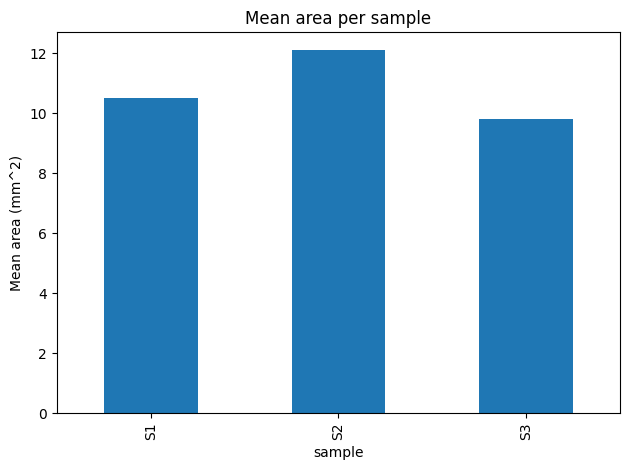

In [40]:
# Simple plotting example

import matplotlib.pyplot as plt

# Example DataFrame
plot_df = pd.DataFrame([
    {"sample": "S1", "mean_area": 10.5},
    {"sample": "S2", "mean_area": 12.1},
    {"sample": "S3", "mean_area": 9.8},
])

ax = plot_df.plot(x="sample", y="mean_area", kind="bar", legend=False)
ax.set_ylabel("Mean area (mm^2)")
ax.set_title("Mean area per sample")
plt.tight_layout()
plt.show()


### ✏ Exercise 11.1.1 (easy): Histogram of values

In the cell below:

1. Create a DataFrame `df` with a column `value` containing at least 20 random or manually chosen floats.
2. Plot a histogram of `value` using `df["value"].plot(kind="hist")`.
3. Add axis labels and a title using `set_xlabel`, `set_ylabel`, and `set_title`.


In [ ]:
# TODO: implement Exercise 11.1.1

# df = pd.DataFrame({"value": [...]})
# ax = df["value"].plot(kind="hist")
# ax.set_xlabel("Value")
# ax.set_ylabel("Frequency")
# ax.set_title("Histogram of measurement values")
# plt.show()


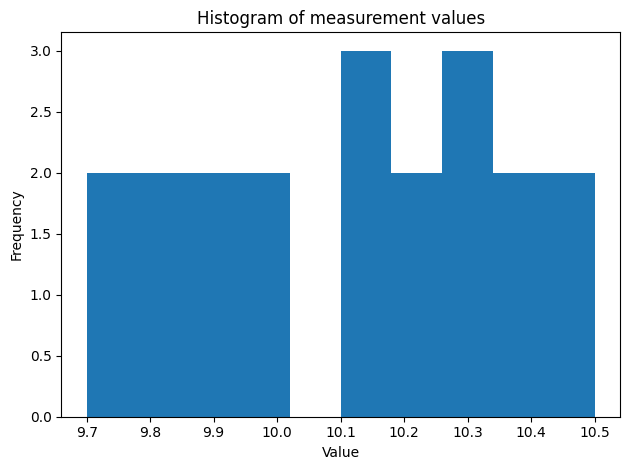

In [41]:
# Reference solution for Exercise 11.1.1
values = [10.1, 10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1,
          10.3, 9.8, 10.0, 10.5, 9.9, 10.2, 10.4, 9.7, 10.1, 10.3]

df = pd.DataFrame({"value": values})
ax = df["value"].plot(kind="hist")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of measurement values")
plt.tight_layout()
plt.show()


### ⚡ Exercise 11.1.2 (advanced): Bar chart of mean value per method

In the cell below:

1. Create a DataFrame `df` with columns `method` and `value` and at least 2 different methods.
2. Use `groupby("method")["value"].mean()` to compute the mean value per method.
3. Plot the result as a bar chart.
4. Label the axes and set a title.


In [ ]:
# TODO: implement Exercise 11.1.2

# df = pd.DataFrame([...])
# mean_by_method = ...
# ax = mean_by_method.plot(kind="bar")
# ax.set_xlabel("Method")
# ax.set_ylabel("Mean value")
# ax.set_title("Mean value per method")
# plt.tight_layout()
# plt.show()


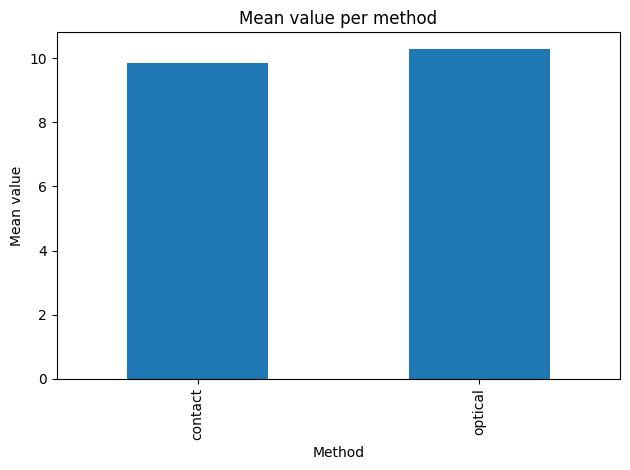

In [42]:
# Reference solution for Exercise 11.1.2
df = pd.DataFrame([
    {"method": "optical", "value": 10.2},
    {"method": "optical", "value": 10.4},
    {"method": "contact", "value": 9.8},
    {"method": "contact", "value": 9.9},
])

mean_by_method = df.groupby("method")["value"].mean()
ax = mean_by_method.plot(kind="bar")
ax.set_xlabel("Method")
ax.set_ylabel("Mean value")
ax.set_title("Mean value per method")
plt.tight_layout()
plt.show()


---
# Short break (14:45 - 15:00)

Last short break before the big combined example.
---

## 12. Complex example: Scientific surface size measurements

In this final example we combine everything from today:

- Comprehensions and generator expressions
- SQLAlchemy ORM with SQLite
- pandas DataFrame operations
- Excel input/output
- Groupby, merge, and plotting

### Scenario

A lab measures the **surface area** of samples using multiple methods:

- `optical` method
- `contact` method
- `afm` (atomic force microscopy) method

Each measurement has:

- `sample_name`
- `method`
- `area_mm2` (surface area in square millimeters)
- `run_id` (which experimental run it belongs to)

We will:

1. Start from a list of raw measurement dicts in Python.
2. Use comprehensions to clean and filter the data.
3. Insert the cleaned data into an SQLite database with SQLAlchemy.
4. Load the data into pandas using `read_sql_query`.
5. Compute statistics per sample and per method with `groupby`.
6. Save aggregated results to Excel.
7. Plot a bar chart comparing methods.


### 💪 Exercise 12.1 (full pipeline): From raw measurements to plots

Follow the steps below inside the code cell. Use only concepts we have seen today.

1. **Raw data and cleaning**
   - Create a list `raw_measurements` of dicts with keys `"sample_name"`, `"method"`, `"area_mm2"`, `"run_id"`.
   - Include some messy entries:
     - Sample names with extra spaces
     - At least one measurement with a negative or zero area that you will later drop
   - Use a **list comprehension** to build a new list `clean_measurements` where:
     - Sample names are stripped of whitespace and uppercased (or lowercased, but be consistent).
     - You keep only entries with `area_mm2` > 0.

2. **Insert into SQLite with SQLAlchemy**
   - Define two models `Sample2` and `SurfaceMeasurement` (to avoid name clashes with earlier models):
     - `Sample2` with `id`, `name`.
     - `SurfaceMeasurement` with `id`, `sample_id`, `method`, `area_mm2`, `run_id`.
   - Use a new Base (for example `Base2 = declarative_base()`) and a separate engine (`sqlite:///surface_measurements.db`).
   - Insert all distinct samples into the `Sample2` table.
   - Insert all measurements into `SurfaceMeasurement` using the correct `sample_id`.

3. **Load into pandas**
   - Use `pd.read_sql_query` with a `JOIN` between `SurfaceMeasurement` and `Sample2` so that you have columns `sample_name`, `method`, `area_mm2`, `run_id` in a DataFrame `df`.

4. **Analyze with pandas**
   - Compute mean area per `(sample_name, method)` using `groupby`.
   - Reset the index so the result is a clean DataFrame.
   - Save the aggregated result to an Excel file `surface_mean_by_sample_and_method.xlsx`.

5. **Visualize**
   - For one selected sample (for example "SAMPLE_A"), filter the aggregated DataFrame.
   - Plot a bar chart showing mean area per method for that sample.
   - Label axes and add a title.

Try to write the solution in logical steps, adding print statements as needed to understand what is happening.


In [ ]:
# TODO: implement Exercise 12.1 - full pipeline

# 1. Raw data and cleaning
# raw_measurements = [
#     {"sample_name": "  Sample_A ", "method": "optical", "area_mm2": 10.2, "run_id": 1},
#     ...
# ]
# clean_measurements = [...]  # list comprehension for cleaning and filtering

# 2. Insert into SQLite with SQLAlchemy
# from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
# from sqlalchemy.orm import declarative_base, sessionmaker

# Base2 = declarative_base()

# class Sample2(Base2):
#     ...

# class SurfaceMeasurement(Base2):
#     ...

# engine2 = create_engine("sqlite:///surface_measurements.db", echo=False, future=True)
# Base2.metadata.create_all(engine2)
# Session2 = sessionmaker(bind=engine2, future=True)
# session2 = Session2()

# # Insert distinct samples
# ...

# # Insert measurements with sample_id
# ...
# session2.commit()

# 3. Load into pandas with JOIN
# sql = "..."  # SELECT with JOIN
# df = pd.read_sql_query(sql, con=engine2)
# print(df.head())

# 4. Analyze with pandas
# grouped = ...
# grouped_reset = ...
# grouped_reset.to_excel("surface_mean_by_sample_and_method.xlsx", index=False)

# 5. Visualize for one sample
# one_sample = ...  # filter grouped_reset
# ax = one_sample.plot(x="method", y="mean_area_mm2", kind="bar")
# ax.set_xlabel("Method")
# ax.set_ylabel("Mean area (mm^2)")
# ax.set_title("Mean area per method for one sample")
# plt.tight_layout()
# plt.show()


Clean measurements:
[{'sample_name': 'SAMPLE_A', 'method': 'optical', 'area_mm2': 10.2, 'run_id': 1}, {'sample_name': 'SAMPLE_A', 'method': 'contact', 'area_mm2': 9.8, 'run_id': 1}, {'sample_name': 'SAMPLE_B', 'method': 'optical', 'area_mm2': 15.0, 'run_id': 1}, {'sample_name': 'SAMPLE_B', 'method': 'afm', 'area_mm2': 14.5, 'run_id': 2}, {'sample_name': 'SAMPLE_C', 'method': 'optical', 'area_mm2': 8.5, 'run_id': 2}]
Joined DataFrame:
   id sample_name   method  area_mm2  run_id
0   1    SAMPLE_A  optical      10.2       1
1   2    SAMPLE_A  contact       9.8       1
2   3    SAMPLE_B  optical      15.0       1
3   4    SAMPLE_B      afm      14.5       2
4   5    SAMPLE_C  optical       8.5       2

Mean area per sample and method:
  sample_name   method  mean_area_mm2
0    SAMPLE_A  contact            9.8
1    SAMPLE_A  optical           10.2
2    SAMPLE_B      afm           14.5
3    SAMPLE_B  optical           15.0
4    SAMPLE_C  optical            8.5
Saved aggregated results to su

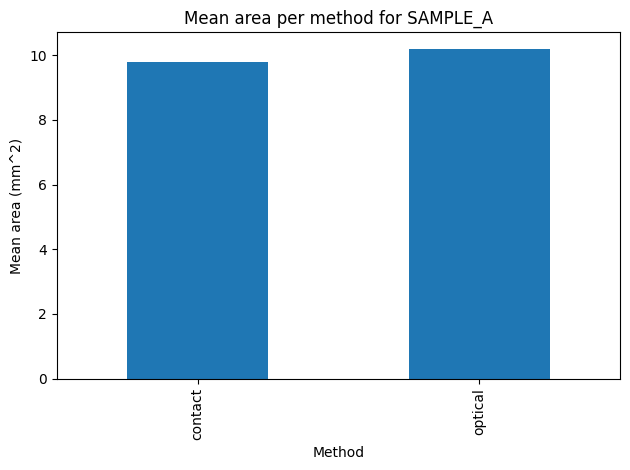

In [43]:
# Reference solution for Exercise 12.1

from sqlalchemy import create_engine as create_engine2, Column as Column2, Integer as Integer2, String as String2, Float as Float2, ForeignKey as ForeignKey2
from sqlalchemy.orm import declarative_base as declarative_base2, sessionmaker as sessionmaker2

# 1. Raw data and cleaning
raw_measurements = [
    {"sample_name": "  Sample_A ", "method": "optical", "area_mm2": 10.2, "run_id": 1},
    {"sample_name": "Sample_A", "method": "contact", "area_mm2": 9.8, "run_id": 1},
    {"sample_name": "sample_b", "method": "optical", "area_mm2": 15.0, "run_id": 1},
    {"sample_name": "Sample_B ", "method": "afm", "area_mm2": 14.5, "run_id": 2},
    {"sample_name": " Sample_C", "method": "optical", "area_mm2": 0.0, "run_id": 1},  # invalid
    {"sample_name": "Sample_C", "method": "optical", "area_mm2": 8.5, "run_id": 2},
]

clean_measurements = [
    {
        "sample_name": m["sample_name"].strip().upper(),
        "method": m["method"],
        "area_mm2": m["area_mm2"],
        "run_id": m["run_id"],
    }
    for m in raw_measurements
    if m["area_mm2"] > 0
]

print("Clean measurements:")
print(clean_measurements)

# 2. Insert into SQLite with SQLAlchemy
Base2 = declarative_base2()

class Sample2(Base2):
    __tablename__ = "samples2"

    id = Column2(Integer2, primary_key=True)
    name = Column2(String2, nullable=False, unique=True)


class SurfaceMeasurement(Base2):
    __tablename__ = "surface_measurements"

    id = Column2(Integer2, primary_key=True)
    sample_id = Column2(Integer2, ForeignKey2("samples2.id"), nullable=False)
    method = Column2(String2, nullable=False)
    area_mm2 = Column2(Float2, nullable=False)
    run_id = Column2(Integer2, nullable=False)


engine2 = create_engine2("sqlite:///surface_measurements.db", echo=False, future=True)
Base2.metadata.create_all(engine2)
Session2 = sessionmaker2(bind=engine2, future=True)
session2 = Session2()

# Insert distinct samples
sample_names = {m["sample_name"] for m in clean_measurements}
name_to_id = {}
for name in sample_names:
    s = Sample2(name=name)
    session2.add(s)
    session2.flush()  # get id without full commit
    name_to_id[name] = s.id

# Insert measurements
for m in clean_measurements:
    sm = SurfaceMeasurement(
        sample_id=name_to_id[m["sample_name"]],
        method=m["method"],
        area_mm2=m["area_mm2"],
        run_id=m["run_id"],
    )
    session2.add(sm)

session2.commit()

# 3. Load into pandas with JOIN
sql = (
    "SELECT sm.id, s.name AS sample_name, sm.method, sm.area_mm2, sm.run_id "
    "FROM surface_measurements AS sm "
    "JOIN samples2 AS s ON sm.sample_id = s.id"
)

df = pd.read_sql_query(sql, con=engine2)
print("Joined DataFrame:")
print(df)

# 4. Analyze with pandas
grouped = df.groupby(["sample_name", "method"])["area_mm2"].mean()

grouped_reset = grouped.reset_index().rename(columns={"area_mm2": "mean_area_mm2"})
print("\nMean area per sample and method:")
print(grouped_reset)

output_excel = "surface_mean_by_sample_and_method.xlsx"
grouped_reset.to_excel(output_excel, index=False)
print(f"Saved aggregated results to {output_excel}")

# 5. Visualize for one sample
one_sample_name = "SAMPLE_A"
one_sample = grouped_reset[grouped_reset["sample_name"] == one_sample_name]

if not one_sample.empty:
    ax = one_sample.plot(x="method", y="mean_area_mm2", kind="bar", legend=False)
    ax.set_xlabel("Method")
    ax.set_ylabel("Mean area (mm^2)")
    ax.set_title(f"Mean area per method for {one_sample_name}")
    plt.tight_layout()
    plt.show()
else:
    print(f"No data for sample {one_sample_name}")

engine2.dispose()

## 13. Day 2 summary

Today we covered a lot of ground around **data handling** and **databases**:

- **Comprehensions and generator expressions**
  - List, dict, and set comprehensions as compact map + filter tools.
  - Conditional and nested comprehensions for simple flattening and combinations.
  - Generator expressions for lazy, memory efficient pipelines.

- **Relational databases and SQLAlchemy**
  - Basic ideas of tables, primary keys, and foreign keys.
  - Using SQLite as an embedded database.
  - Creating an engine, defining models with a declarative base.
  - Using sessions to perform CRUD operations.

- **pandas DataFrame basics**
  - Creating DataFrames from dicts and from SQL tables.
  - Inspecting data with `head`, `info`, and `describe`.
  - Selecting, filtering, and creating derived columns.

- **pandas and SQL**
  - Loading tables and queries with `read_sql_table` and `read_sql_query`.
  - Combining SQL for storage and pandas for analysis.

- **Excel (xlsx) integration**
  - Exporting DataFrames with `to_excel` and reading them back with `read_excel`.

- **Groupby, aggregation, and joins**
  - Summaries with `groupby` and `agg`.
  - Joining tables with `pd.merge` to enrich measurement data with sample metadata.

- **Visualization with matplotlib**
  - Quick plotting from pandas Series and DataFrames (histograms, bar charts).
  - Labeling axes and adding titles.

- **Complex pipeline example**
  - Cleaning scientific measurement data with comprehensions.
  - Storing them in SQLite with SQLAlchemy.
  - Loading them into pandas, aggregating per sample and method.
  - Exporting results to Excel and plotting mean values.

These patterns are very close to what real-world data analysis and scientific scripting looks like in Python. In the next days we will build on this foundation with parallel computing and deep learning.
